# <div align="center"> CODEX: Coverage of Data Explorer </div>
The Coverage of Data Explorer (CODEX) tool is a Python package that implements data coverage metrics and algorithms for artificial intelligence (AI)/machine learning (ML) test and evaluation (T&E) applications. CODEX’s metrics are based on the theory of combinatorial testing (CT) adapted from software testing to AI/ML T&E with a data-centric focus. 

As a data assurance tool, CODEX requires datasets for all functionalities. Some functionalities additionally require ML training algorithms and a mechanism for automatically training models and evaluating them on a test set (a test harness). CODEX provides functionalities such as:

- Evaluation of the coverage of a defined universe by a dataset, which may be used for applications such as selecting a model for deployment domain
- Between dataset coverage, which may be used for applications such as computing the difference between a test and training set to generate representative and challenging test sets
- Systematic inclusion/exclusion framework (SIE), which is used for identification of critical metadata factors
- Data splitting algorithms, which may be used to construct balanced data sets for training or testing. The SIE framework uses the data splitting algorithm for constructing a balanced universal test set. In the future, this framework could use the same algorithm to produce training sets that are not only covering but also balanced. 
- Prioritization of samples to best cover a space, which may be used to support high information gain in resource restricted scenarios such as labeling and retraining

# Quickstart Tutorial
- CODEX can be imported as a Python library with `import codex` or directly from running `python codex/codex.py` as a main entry point.

## Prerequisites
- CODEX, developed for Python 3, requires multiple packages including `pandas`, `numpy`, and `matplotlib`.
- Dependencies for CODEX can be installed upon installation as a library with
`python -m pip install ../`
- If being ran directly, dependenceis for CODEX can be installed with
`python -m pip install ../requirements.txt`



In [1]:
!python -m pip install ../
!python -m pip install -r ../requirements.txt
!python -m pip install directory_tree

Defaulting to user installation because normal site-packages is not writeable
Processing /home/hume-users/leebri2n/PROJECTS/dote_1070-1083/codex_nsi
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for codex: filename=codex-2024.1.1-py3-none-any.whl size=100824 sha256=292c038fcb185d8ad8a85d3ea4cdea1ff76ef9d04d7587cce56c44937313dc0b
  Stored in directory: /tmp/pip-ephem-wheel-cache-amnwy_9_/wheels/91/0e/1a/c7123871a937d1740077231369536e3f7730e6fc6a2fc15764
Successfully built codex
  Attempting uninstall: codex
    Found existing installation: codex 2024.1.1
    Uninstalling codex-2024.1.1:
      Successfully uninstalled codex-2024.1.1
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [11]:
import codex.codex as codex
from codex.modules import output
import os
import json
import pandas as pd
from PIL import Image

### Learning Objectives
After following this notebook, you should be able to:
- Understand what is required for a codex environment and how to set one up.
- Fill out a CODEX config file and run experiment via command line OR as a module.
- How to construct a universe for CODEX.
- View format requirements for datasets, splits, and performance files.
- Find and view the outputs of an experiment.

## CODEX Setup

### CODEX directory
Dedicating a specific directory for applying CODEX to a specific dataset is encouraged. The concept of a 'CODEX directory' is for the sake of preservation of input materials for experiments and other artifacts. While elements can be passed to CODEX in a piecewise fashion, utilizing a CODEX directory helps to keep materials organized.

In [3]:
codex_dir = codex.setup_new_codex_env('new', templates=True, tutorial=True)

new_5/
├── binning/
│   └── binning_TEMPLATE.txt
├── configs/
│   ├── configs_rareplanes_EX.json
│   └── configs_TEMPLATE.json
├── data/
│   ├── dataset_abstract_EX.csv
│   └── dataset_rareplanes_lightweight_EX.csv
├── performance/
│   └── performance_TEMPLATE.json
├── runs/
├── splits/
│   └── splits_TEMPLATE.json
└── universe/
    └── universe_TEMPLATE.json


At most, a proper CODEX directory contains the following:
- Config files: .json files specifying file locations
- Binning files: .txt files explicitly listing features and values while binning continuous feature-values.
- Performance files: .json files containing overall as well as per-sample performance.
- Split files: .json files containing sample ID's reflecting samples ID's from the dataset for each split.

### Dataset
CODEX is a tool that evaluates a dataset for vairious applications in machine learning.

Because of the combinatorial testing-based framework of CODEX, CODEX requires a tabular dataset as its input data, that is, a table/matrix format of data with rows of samples and columns of features, which hold values for features.

In [5]:
display(pd.read_csv(os.path.join(codex_dir, 'data', 'dataset_rareplanes_lightweight_EX.csv')))

,image_tile_id,image_id,loc_id,Country,State_Province,Air_Field,Latitude,Longitude,Weather,Time_of_Day,Hour_of_Day,Season,avg_sun_elevation_angle,off_nadir_max,avg_pan_resolution,biome,realm,CONTROL
0,84_1040010049B46C00_tile_202,84_1040010049B46C00,84,USA,Florida,Fort Lauderdale-Hollywood International Airport,26.072017,-80.150997,Cloud Cover or Haze,Day,12.183333,Spring,54.206795,28.062920,0.377690,Flooded Grasslands & Savannas,Neotropic,3
1,67_104001003F0B3200_tile_679,67_104001003F0B3200,67,USA,Utah,Salt Lake City International Airport,40.790066,-111.979898,Clear Skies,Day,12.933333,Summer,71.380670,19.613453,0.342129,Deserts & Xeric Shrublands,Nearctic,3
2,130_104001002E47CD00_tile_1090,130_104001002E47CD00,130,USA,Pennsylvania,Philadelphia International Airport,39.875018,-75.235213,Cloud Cover or Haze,Day,12.033333,Summer,69.640220,29.135172,0.388910,"Temperate Grasslands, Savannas & Shrublands",Nearctic,3
3,57_10400100379F8200_tile_137,57_10400100379F8200,57,USA,Florida,Vero Beach Municipal Airport,27.657215,-80.418330,Cloud Cover or Haze,Day,11.266667,Winter,38.286674,27.641428,0.377411,"Temperate Grasslands, Savannas & Shrublands",Nearctic,3
4,109_10400100168E2A00_tile_33,109_10400100168E2A00,109,USA,Oregon,Scappoose Industrial Airpark,45.771897,-122.863239,Clear Skies,Day,11.583333,Winter,22.032475,23.903067,0.357787,"Temperate Grasslands, Savannas & Shrublands",Nearctic,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,18_10400100211BDD00_tile_4385,18_10400100211BDD00,18,Germany,Hesse,Frankfurt Flughafen,50.052932,8.569915,Clear Skies,Day,12.783333,Autumn,44.877602,10.872156,0.320573,Temperate Broadleaf & Mixed Forests,Palearctic,3
96,2_104001003B4B5900_tile_16,2_104001003B4B5900,2,Belgium,Wallonia,Aerodrome de Saint Hubert,50.036244,5.404038,Clear Skies,Day,12.850000,Spring,54.891712,28.461687,0.386083,Temperate Broadleaf & Mixed Forests,Palearctic,1
97,69_104005000CDBE200_tile_1852,69_104005000CDBE200,69,France,Ile-de-France,Tremblay-en-France Airport,49.006891,2.571082,Clear Skies,Day,13.233333,Autumn,46.019230,17.414585,0.336675,Temperate Broadleaf & Mixed Forests,Palearctic,1
98,67_104001003F0B3200_tile_1394,67_104001003F0B3200,67,USA,Utah,Salt Lake City International Airport,40.790066,-111.979898,Clear Skies,Day,12.933333,Summer,71.380670,19.613453,0.342129,Deserts & Xeric Shrublands,Nearctic,3


### Universe Construction
Combinatorial coverage metrics are computed with respect to a defined universe describing the input dataset. Because of this combinatorial approach, the defined universe must be constructed with discrete values, where continuous features in the data are discretized. Providing the universe for the experiment can be done one of three ways.

1) Learning from dataset: Upon reading in the dataset, the universe is constructed by treating each appearing unique value for a feature as a level in the universe. Note that for this method, discretizing continouous features by uniqueness of values can result in an infinite amount levels for a continuous feature.
2) Using a previous universe: Universes from a CODEX experiment can be saved. Whether user-written or from a previous universe, providing a directory or file path to the universe file through the input file, the universe for one experiment can applied to any other. 
3) Binning file: A separate text file known as the binning file specifying the binning scheme of features and values can be provided to construct the universe.
- A major advantage of this method lies in the semantic meaning the user can apply in the binning schemes. Continuous variables can have customized bins depending on the nature of the feature, and categorical variables can be reordered for more meainingful order (e.g., ordering 'Spring', 'Summer', 'Fall', 'Winter', the feature 'Season' rather than the order it appears in the dataset). 
    
For methods 2) and 3), these methods of universe construction are valid so long as:
- No feature or value exists in the dataset that does not exist in  while option `use_augmented_universe` is off. If `use_augmented_universe` is on, features and/or values expand the current universe.
- Bins for continuous features at minimum cover the range of values that appear in dataset, meaning maximum and minimum are included.



#### Format
- Binning file (`.txt`)
    - Features are specified on each line, separated from its values with a colon (':').
    - Values are specified following, separated from its values with semicolons (';').
- Universe file (1-layer `dict`/`.json`)
    - Under a `features` key, a list of feature names.
    - Under a `values`, a 2D list containing values corresponding to each feature.

#### Previous universe

In [6]:
with open(os.path.join('..', 'resources', 'templates', 'universe_TEMPLATE.json')) as f:
    predefined_universe = json.load(f)
    display(predefined_universe)

{'features': ['A', 'B', 'C'],
 'levels': [['a1', 'a2', 'a3'], ['b1', 'b2'], ['c1', 'c2', 'c3', 'c4']]}

#### Binning file

In [7]:
binning = os.path.join('..', 'resources', 'templates', 'binning_TEMPLATE.txt')
dataset_unbinned = os.path.join('..', 'resources', 'templates', 'dataset_EXAMPLE.csv')

with open(os.path.join('..', 'resources', 'templates', 'binning_TEMPLATE.txt')) as f:
    print(f.read())

feature_0: [0,5];(5,10]
feature_1: level1;level2;level3;level4
feature_2: level1;level2;level3


## Running CODEX: Dataset Evaluation
To observe how CODEX uses all these elements to run an experiment, we will run CODEX `dataset_split_evaluation` on an example dataset.

### Dataset: RarePlanes
RarePlanes is an open source dataset consisting of real and synthetic images of planes overhead. Of the real dataset, 253 satellite images are distributed among 8,525 image tiles. RarePlanes also includes a metadata table for each of the 253 images, which can be used for CODEX.

Below is an example of one such tile, along with its associated metadata as it would appear in the `.csv` dataset.


image_id                                               84_1040010049B46C00
loc_id                                                                  84
Country                                                                USA
State_Province                                                     Florida
Air_Field                  Fort Lauderdale-Hollywood International Airport
Latitude                                                         26.072017
Longitude                                                       -80.150997
Weather                                                Cloud Cover or Haze
Time_of_Day                                                            Day
Hour_of_Day                                                      12.183333
Season                                                              Spring
avg_sun_elevation_angle                                          54.206795
off_nadir_max                                                     28.06292
avg_pan_resolution       

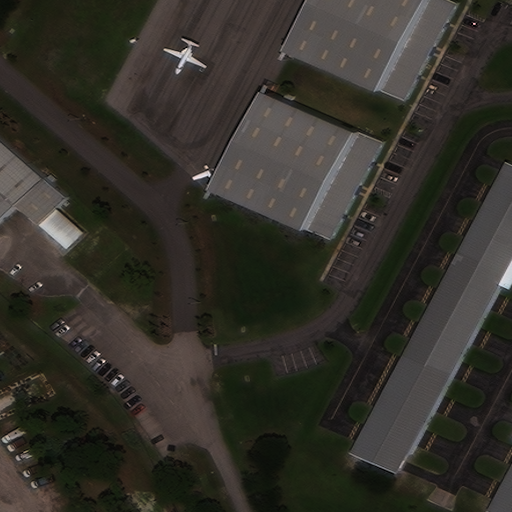

In [13]:
rareplanes_df = pd.read_csv(os.path.join(codex_dir, 'data', 'dataset_rareplanes_lightweight_EX.csv'), index_col = 'image_tile_id')

display(rareplanes_df.loc['84_1040010049B46C00_tile_202'])
display(Image.open(os.path.join('..', 'resources', '98_104001000F15D300_tile_177.png')))

In [ ]:
input_file = os.path.join()

In [ ]:
codex.run(input_file, verbose='1')

KeyError: 'timed_output'

### Observing Results


### Running CODEX with extra requirements: Dataset Split Evaluation Example
Certain modes of CODEX require extra components for the analysis. `dataset_split_evaluation` computes set difference combinatorial coverage (SDCC) between two portions of a single dataset with respect to a defined universe, which can be used describe the relationship between splits of a dataset, like test and train.

Because `dataset_split_evaluation` is examining different portions of a dataset, this mode requires an extra element, the split file which specifies which samples belong to which split. The sample IDs in this split file are as they appear in the dataset.

In [ ]:
train_ids = []
val_ids = []
test_ids = []

split = {'train': train_ids,
         'validation': val_ids,
         'test': test_ids}
codex.output.output_json_readable(write_json=True, file_path=os.path.join(codex_dir, 'splits', 'split_example.json'))

input['split_dir'] = 'splits'
input['split_file'] = 'split_exmaple.json'

In [ ]:
codex.run(input, verbose='1')